APRIORI

In [29]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Load the dataset from the provided URL
data = pd.read_csv("./stock_dataset.csv")

# Process the DATE column (e.g., extract the year)
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year

# Define the binning function for numerical columns
def binning(x, column):
    median = data[column].median()
    if x <= median:
        return 'low'
    elif x > median and x <= data[column].quantile(0.75):
        return 'medium'
    else:
        return 'high'

numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for column in numeric_columns:
    data[column] = data.apply(lambda row: binning(row[column], column), axis=1)

# Create a new DataFrame for transactions
transaction_data = data[['Year', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

# One-hot encode the data
transaction_data = pd.get_dummies(transaction_data, columns=['Year', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])

# Ensure that the transaction data contains only 0s and 1s
transaction_data[transaction_data > 0] = 1

# Use Apriori to mine association rules
frequent_itemsets = apriori(transaction_data, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Print the association rules
print(rules)



C:\Users\subasini\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


              antecedents                                        consequents  \
0             (Year_2018)                                         (Open_low)   
1              (Open_low)                                        (Year_2018)   
2             (Year_2018)                                         (High_low)   
3              (High_low)                                        (Year_2018)   
4             (Year_2018)                                          (Low_low)   
...                   ...                                                ...   
43355  (Adj Close_medium)  (Close_medium, Open_medium, High_medium, Year_...   
43356       (Open_medium)  (Close_medium, Adj Close_medium, High_medium, ...   
43357       (High_medium)  (Close_medium, Adj Close_medium, Open_medium, ...   
43358        (Low_medium)  (Close_medium, Adj Close_medium, Open_medium, ...   
43359        (Volume_low)  (Close_medium, Adj Close_medium, Open_medium, ...   

       antecedent support  consequent s

DESCRIPTIVE ANALYSIS

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data = pd.read_csv("./stock_dataset.csv")

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       96 non-null     object 
 1   Open       96 non-null     float64
 2   High       96 non-null     float64
 3   Low        96 non-null     float64
 4   Close      96 non-null     float64
 5   Adj Close  96 non-null     float64
 6   Volume     96 non-null     int64  
 7   Class      96 non-null     int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 6.1+ KB


In [33]:
sorted_df = data.sort_values('Volume', ascending = True).head(10)
sorted_df

,Date,Open,High,Low,Close,Adj Close,Volume,Class
72,09/10/2023,451.350006,455.540009,450.559998,451.420013,451.420013,248385,2
59,01/10/2023,166.500000,167.100006,158.850006,164.050003,164.050003,1692000,1
71,01/10/2023,435.850006,455.540009,432.350006,451.420013,451.420013,1692900,2
95,01/10/2023,410.700012,415.950012,392.850006,396.450012,396.450012,1876871,3
63,01/02/2023,420.339996,437.269989,414.519989,414.549988,411.692139,3083700,2
87,01/02/2023,373.000000,374.250000,345.500000,346.149994,346.149994,3663702,3
89,01/04/2023,325.700012,369.850006,324.100006,360.399994,360.399994,3787233,3
65,01/04/2023,412.739990,425.000000,398.190002,411.690002,409.717194,3852000,2
62,01/01/2023,402.320007,437.190002,393.290009,422.940002,420.024323,4648600,2
60,01/11/2022,427.940002,461.290009,403.220001,461.290009,457.208618,4859700,2


In [34]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,96.0,2.433041e+02,1.397631e+02,76.000000,1.165000e+02,1.783750e+02,3.792750e+02,6.697000e+02
High,96.0,2.602985e+02,1.501066e+02,89.680000,1.214625e+02,1.877750e+02,4.099125e+02,6.800000e+02
Low,96.0,2.250948e+02,1.258441e+02,51.779999,1.091625e+02,1.641500e+02,3.526625e+02,4.860000e+02
Close,96.0,2.407697e+02,1.334466e+02,77.000000,1.162250e+02,1.790000e+02,3.753500e+02,5.615500e+02
Adj Close,96.0,2.371938e+02,1.357463e+02,72.397423,1.108780e+02,1.741334e+02,3.753500e+02,5.615500e+02
Volume,96.0,9.745797e+06,6.174570e+06,248385.000000,6.546520e+06,8.757294e+06,1.069908e+07,4.085020e+07
Class,96.0,1.614583e+00,8.506319e-01,1.000000,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00


In [35]:
most_volume = data.query('Volume>1500000', inplace = False).sort_values('Volume', ascending = False)
most_volume[:10]

,Date,Open,High,Low,Close,Adj Close,Volume,Class
73,01/12/2021,669.700012,680.000000,486.000000,561.549988,561.549988,40850197,3
93,01/08/2023,381.899994,449.950012,371.299988,426.000000,426.000000,36182166,3
16,01/03/2020,100.000000,100.699997,51.779999,77.000000,72.397423,27423032,1
77,01/04/2022,425.000000,546.549988,423.000000,442.200012,442.200012,25063622,3
92,01/07/2023,353.850006,401.899994,350.000000,379.549988,379.549988,22094488,3
74,01/01/2022,565.900024,617.500000,480.100006,498.200012,498.200012,20387258,3
94,01/09/2023,428.049988,466.450012,406.000000,410.700012,410.700012,19642186,3
75,01/02/2022,505.299988,573.799988,368.100006,409.649994,409.649994,18539999,3
76,01/03/2022,409.649994,463.000000,395.100006,422.750000,422.750000,15665041,3
2,01/01/2019,86.800003,98.360001,79.800003,96.480003,89.136223,15552659,1


In [36]:
data[["High"]].iloc[18]

High    93.400002
Name: 18, dtype: float64

In [37]:
data[["Low"]].iloc[10]

Low    103.699997
Name: 10, dtype: float64

C:\Users\subasini\AppData\Local\Temp\ipykernel_16676\327981933.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.High)


<Axes: xlabel='High', ylabel='Density'>

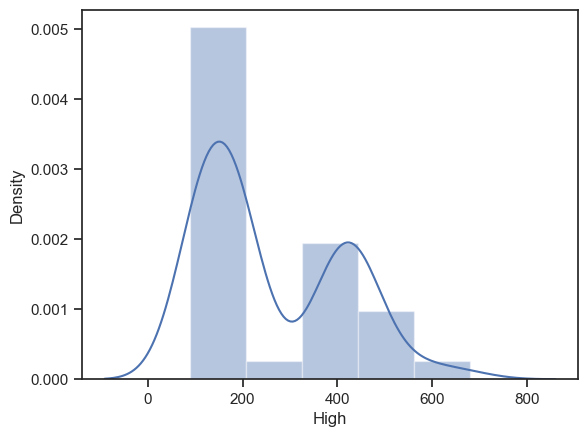

In [38]:
sns.distplot(data.High)

<Axes: >

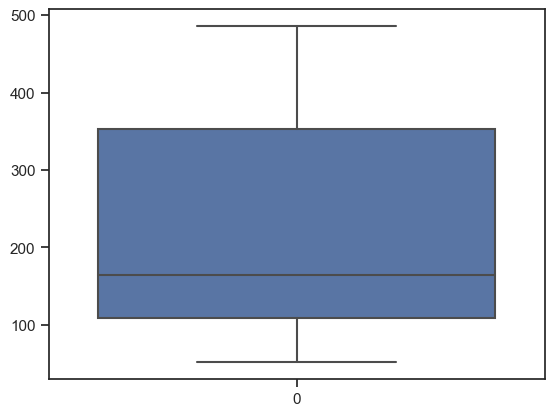

In [39]:
sns.boxplot(data.Low)

[Text(0.5, 1.0, 'High vs Volume')]

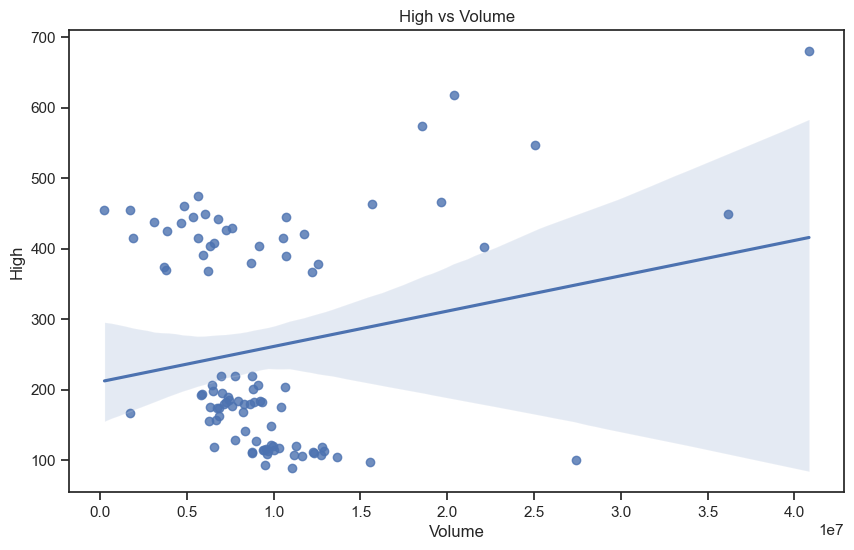

In [40]:
plt.figure(figsize=(10,6))
sns.regplot(data = data, y = "High", x ="Volume", color = "b").set(title = "High vs Volume")

Summary Statistics:
             Open        High         Low       Close   Adj Close  \
count   96.000000   96.000000   96.000000   96.000000   96.000000   
mean   243.304062  260.298542  225.094792  240.769688  237.193807   
std    139.763125  150.106634  125.844066  133.446640  135.746288   
min     76.000000   89.680000   51.779999   77.000000   72.397423   
25%    116.500000  121.462502  109.162498  116.225002  110.878019   
50%    178.375000  187.775002  164.150002  179.000000  174.133384   
75%    379.274994  409.912498  352.662491  375.350006  375.350006   
max    669.700012  680.000000  486.000000  561.549988  561.549988   

             Volume      Class  
count  9.600000e+01  96.000000  
mean   9.745797e+06   1.614583  
std    6.174570e+06   0.850632  
min    2.483850e+05   1.000000  
25%    6.546520e+06   1.000000  
50%    8.757294e+06   1.000000  
75%    1.069908e+07   2.000000  
max    4.085020e+07   3.000000  

First 5 Rows of Data:
         Date        Open        High 

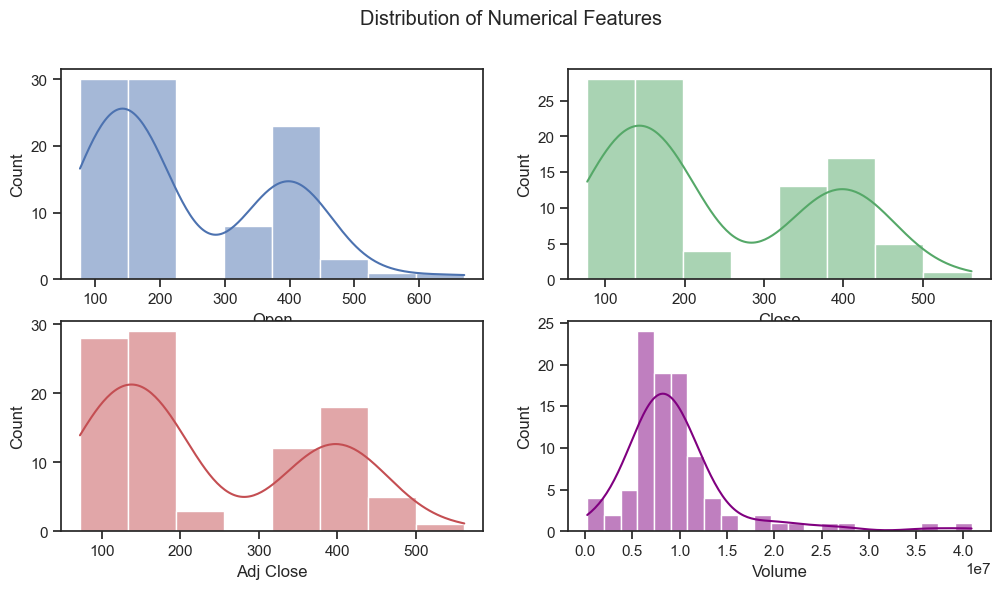

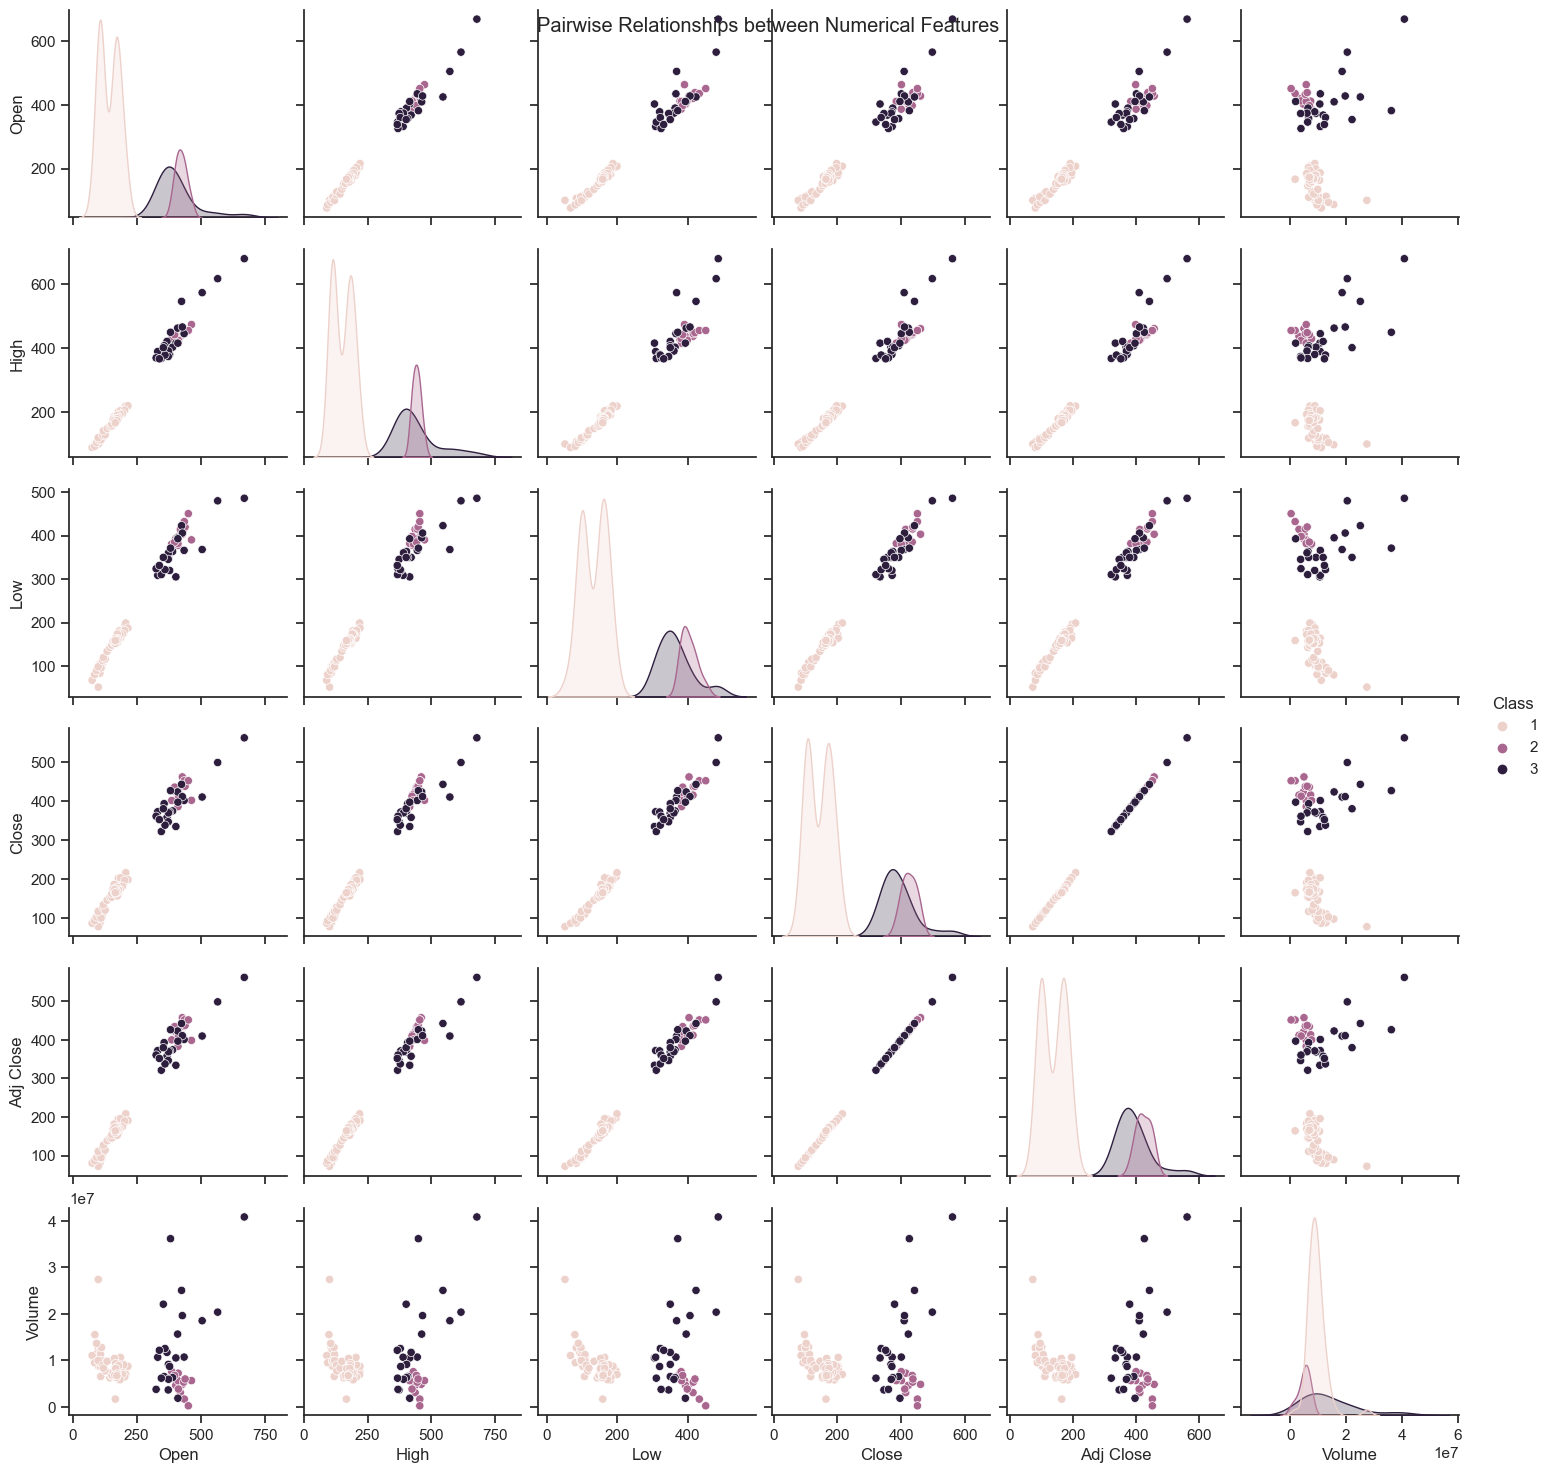

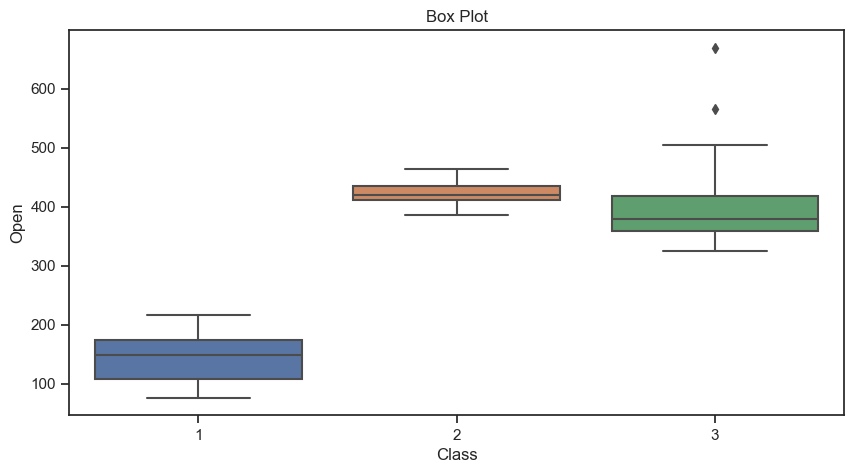

C:\Users\subasini\AppData\Local\Temp\ipykernel_16676\190783627.py:39: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


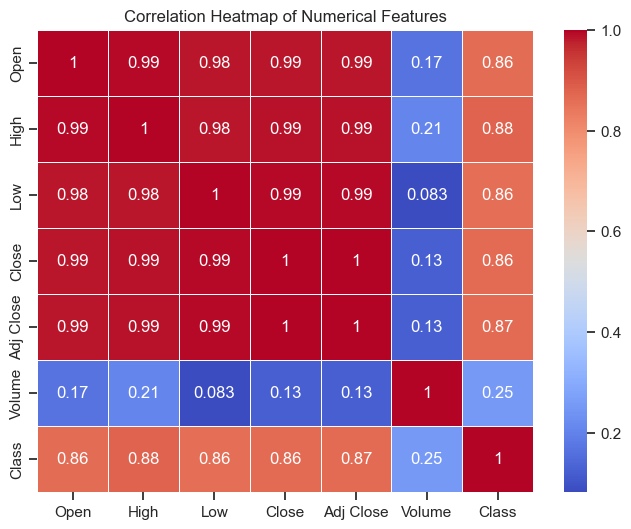

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Display basic statistics about the dataset
print("Summary Statistics:")
print(data.describe())

# Show the first few rows of the dataset
print("\nFirst 5 Rows of Data:")
print(data.head())

# Distribution of numerical features (histograms)
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data['Open'], kde=True, color='b')
plt.subplot(2, 2, 2)
sns.histplot(data['Close'], kde=True, color='g')
plt.subplot(2, 2, 3)
sns.histplot(data['Adj Close'], kde=True, color='r')
plt.subplot(2, 2, 4)
sns.histplot(data['Volume'], kde=True, color='purple')
plt.suptitle("Distribution of Numerical Features")
plt.show()

# Pairwise relationships between numerical features (scatterplot matrix)
sns.set(style="ticks")
sns.pairplot(data, hue="Class")
plt.suptitle("Pairwise Relationships between Numerical Features")
plt.show()

# Box plots for categorical vs. numerical features
plt.figure(figsize=(10, 5))
sns.boxplot(x="Class", y="Open", data=data)
plt.title("Box Plot")
plt.show()

# Correlation heatmap of numerical features
corr_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


PREDICTIVE ANALYSIS

Mean Squared Error: 363.67896173379046


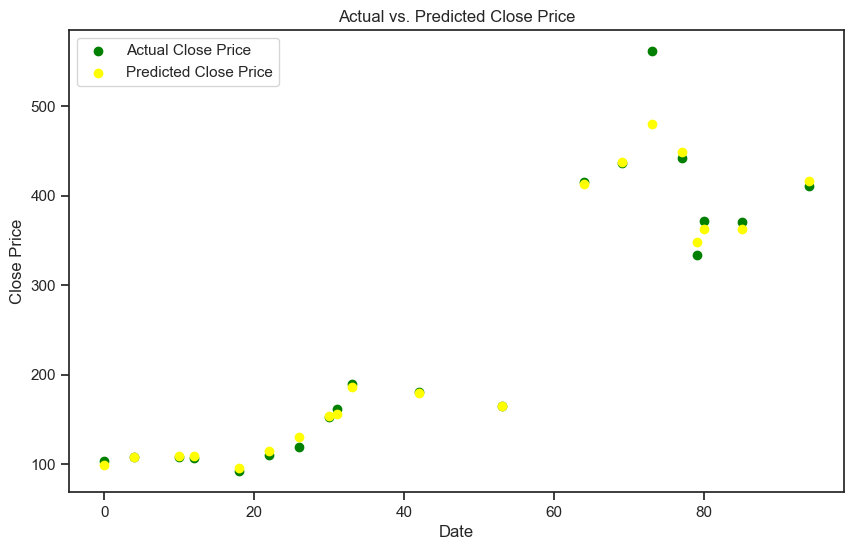

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset from the provided URL
data = pd.read_csv("./stock_dataset.csv")

# Process the DATE column (e.g., extract the year)
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year

data = data.drop(['Date'], axis=1)

# Prepare the target variable (Close price) and features
target = data['Close']
features = data.drop(['Close'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualize the predicted vs. actual stock prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, label='Actual Close Price', color='Green')
plt.scatter(y_test.index, y_pred, label='Predicted Close Price', color='Yellow')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price')
plt.show()



CLASSIFICATION


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
[[12  0  0]
 [ 0  2  0]
 [ 0  0  6]]


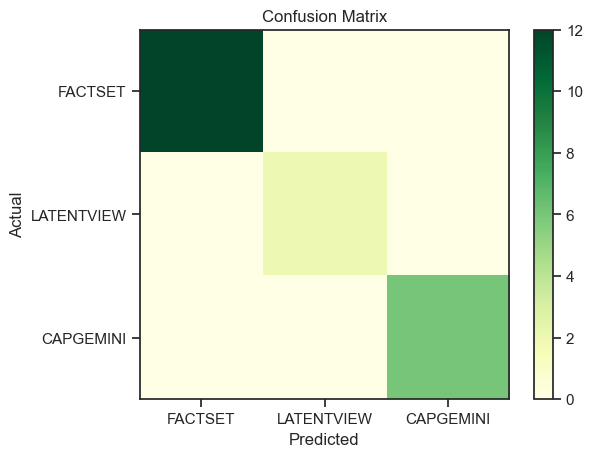

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

data = pd.read_csv("./stock_dataset.csv")

# Process the DATE column (e.g., extract the year)
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year

data = data.drop(['Date'], axis=1)

target = data['Class']
features = data.drop(['Class'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classification model
print(classification_report(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

# Visualize the confusion matrix
plt.imshow(confusion, cmap='YlGn', interpolation='none')
plt.colorbar()
plt.xticks([0, 1, 2], ['FACTSET', 'LATENTVIEW', 'CAPGEMINI'])
plt.yticks([0, 1, 2], ['FACTSET', 'LATENTVIEW', 'CAPGEMINI'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

PREDICTION INPUT

In [44]:
from sklearn.naive_bayes import MultinomialNB


X = data.drop('Class', axis=1)
y = data['Class']
classifier = MultinomialNB()
classifier.fit(X, y)

# Prompt the user for input features
user_input = {}
for feature in X.columns:
    # Ensure that the user enters numerical values
    while True:
        try:
            value = float(input(f"Enter the value for {feature}: "))
            user_input[feature] = value
            break  # Exit the loop if the input is valid
        except ValueError:
            print("Please enter a numerical value for the feature.")

# Create a DataFrame with the user's input
user_df = pd.DataFrame([user_input])

# Use the trained model to predict the class
predicted_class = classifier.predict(user_df)[0]
print(f"Predicted Class (Company): {predicted_class}")


Predicted Class (Company): 2


HISTORICAL_DATA_ANALYSIS

In [47]:
import pandas as pd

# Load your dataset (replace with your dataset file path)
data = pd.read_csv("./stock_dataset.csv")

# Convert the "Date" column to a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# Find the most recent date in your dataset
most_recent_date = data['Date'].max()

# Calculate the date 5 years ago from the most recent date
five_years_ago = most_recent_date - pd.DateOffset(years=2)

# Filter the dataset to keep records within the last 5 years
historical_data_last_5_years = data[data['Date'] >= five_years_ago]

# Display the historical data for the past 5 years
print(historical_data_last_5_years)


         Date        Open        High         Low       Close   Adj Close  \
38 2022-01-01  215.699997  220.199997  187.649994  197.449997  190.804413   
39 2022-01-02  199.449997  206.899994  176.000000  188.300003  181.962387   
40 2022-01-03  186.699997  204.699997  164.199997  202.500000  195.684464   
41 2022-01-04  202.899994  206.500000  182.050003  196.100006  189.499878   
42 2022-01-05  194.199997  195.899994  174.050003  180.500000  174.424911   
43 2022-01-06  178.750000  184.100006  162.750000  163.449997  157.948761   
44 2022-01-07  161.850006  185.800003  153.800003  185.350006  181.525314   
45 2022-01-08  184.750000  193.600006  172.600006  173.000000  169.430161   
46 2022-01-09  170.949997  184.699997  152.300003  165.500000  162.084915   
47 2022-01-10  163.149994  175.750000  153.000000  166.250000  162.819443   
48 2022-01-11  167.399994  183.149994  157.300003  171.000000  167.471420   
49 2022-01-12  174.399994  179.800003  154.600006  155.949997  152.731979   

WHICH_STOCK _TO_BUY

In [49]:
import pandas as pd

# Load your dataset (replace with your dataset file path)
data = pd.read_csv("./stock_dataset.csv")

# Calculate the average value for each class
class_performance = data.groupby('Class').mean()

# Find the class with the highest average performance
best_class = class_performance['Close'].idxmax()

# Print the best-performing class
print(f"The best stock to buy is in Class {best_class}")


The best stock to buy is in Class 2


C:\Users\subasini\AppData\Local\Temp\ipykernel_16676\1265366069.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  class_performance = data.groupby('Class').mean()


AVERAGE_DAILY_RETURNS

In [50]:
import pandas as pd

# Load your dataset (replace with your dataset file path)
data = pd.read_csv("./stock_dataset.csv")

# Convert the "Date" column to datetime objects
data['Date'] = pd.to_datetime(data['Date'])

# Filter the dataset for a specific stock (e.g., Class 1)
stock_data = data[data['Class'] == 1]

# Sort the data by date in ascending order
stock_data = stock_data.sort_values(by='Date')

# Calculate the daily returns
stock_data['Daily_Return'] = stock_data['Close'].pct_change()

# Calculate the average daily return
average_daily_return = stock_data['Daily_Return'].mean()

# Display the average daily return
print(f"The average daily return for Class 1 is {average_daily_return:.4%}")

# Filter the dataset for a specific stock (e.g., Class 1)
stock_data = data[data['Class'] == 2]

# Sort the data by date in ascending order
stock_data = stock_data.sort_values(by='Date')

# Calculate the daily returns
stock_data['Daily_Return'] = stock_data['Close'].pct_change()

# Calculate the average daily return
average_daily_return = stock_data['Daily_Return'].mean()

# Display the average daily return
print(f"The average daily return for Class 2 is {average_daily_return:.4%}")

# Filter the dataset for a specific stock (e.g., Class 1)
stock_data = data[data['Class'] == 3]

# Sort the data by date in ascending order
stock_data = stock_data.sort_values(by='Date')

# Calculate the daily returns
stock_data['Daily_Return'] = stock_data['Close'].pct_change()

# Calculate the average daily return
average_daily_return = stock_data['Daily_Return'].mean()

# Display the average daily return
print(f"The average daily return for Class 3 is {average_daily_return:.4%}")


The average daily return for Class 1 is 1.1188%
The average daily return for Class 2 is -0.0304%
The average daily return for Class 3 is -1.1964%


VOLUME_OF_SALES

In [1]:
import pandas as pd
CAP=pd.read_csv('./CAP.PA.csv')
LV=pd.read_csv("./FDS.csv")
FDS=pd.read_csv("./LATENTVIEW.NS.csv")
DATA = pd.read_csv("./stock_dataset.csv")
company_list = [CAP,LV,FDS,DATA]

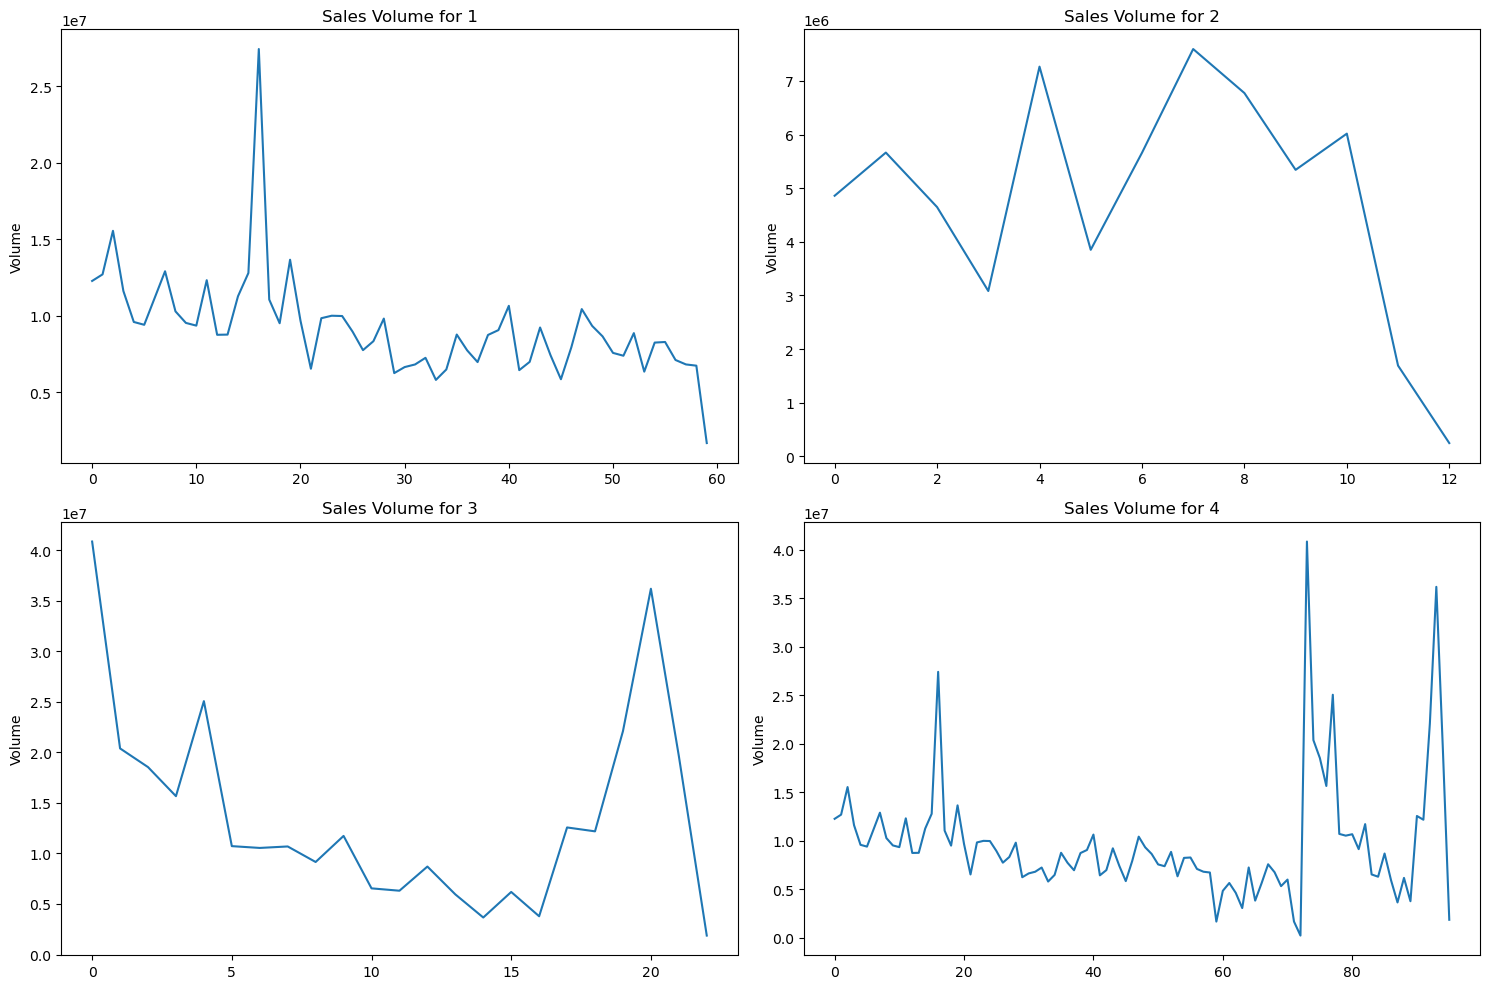

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {i}")
    
plt.tight_layout()

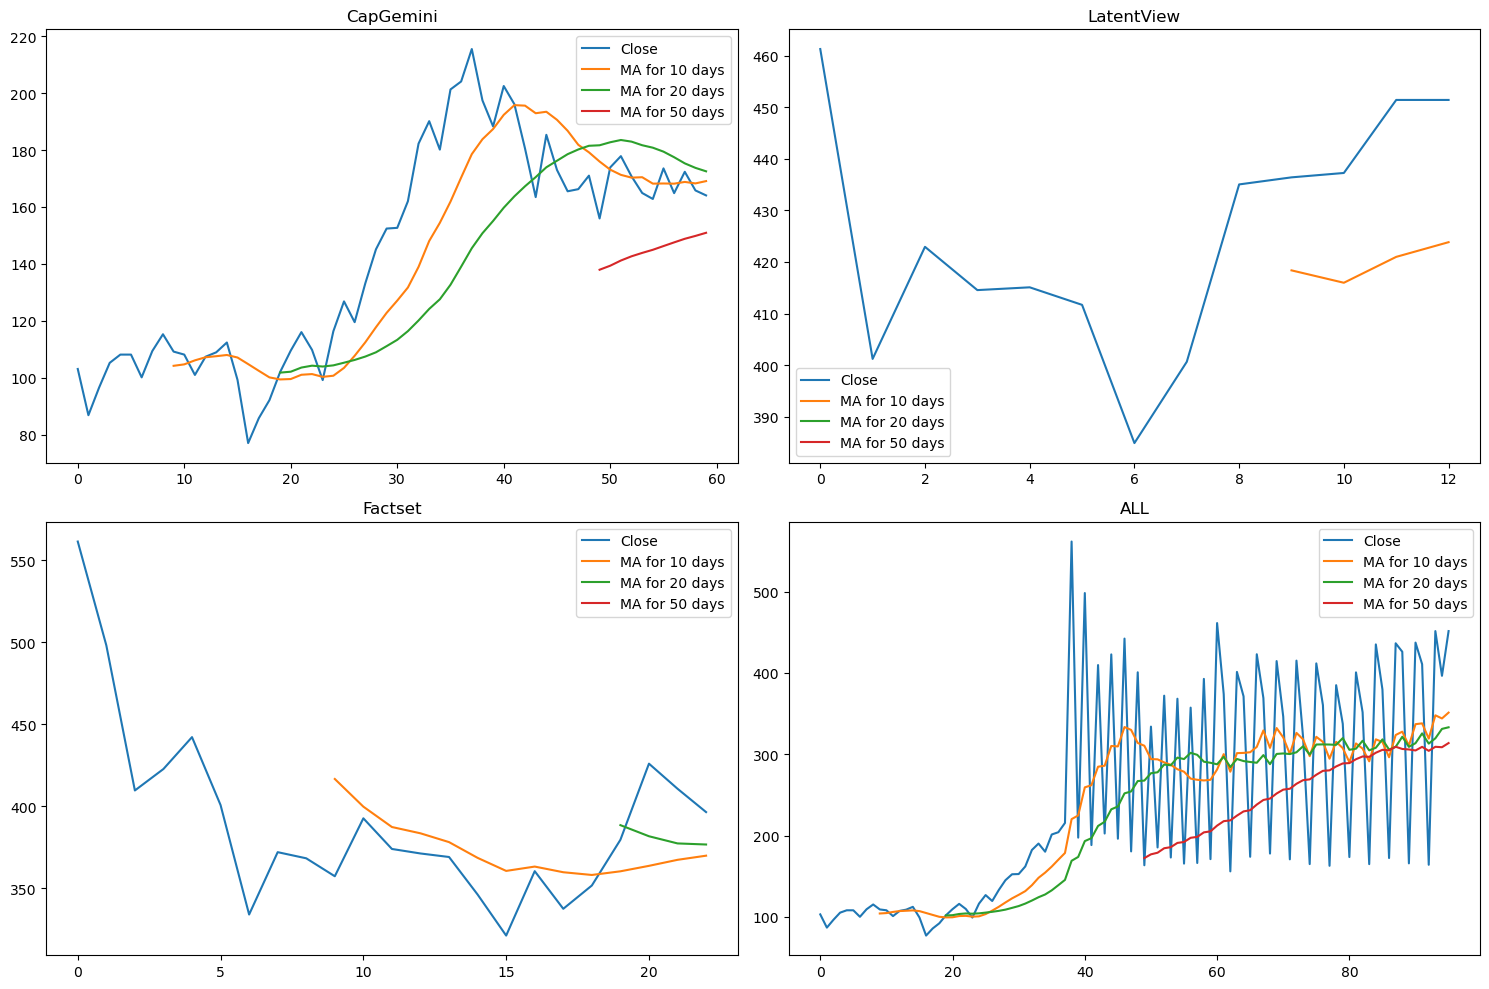

In [5]:
import matplotlib.pyplot as plt
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

CAP[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('CapGemini')

LV[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('LatentView')

FDS[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Factset')

DATA[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('ALL')

fig.tight_layout()


DAILY_RETURN_COUNT

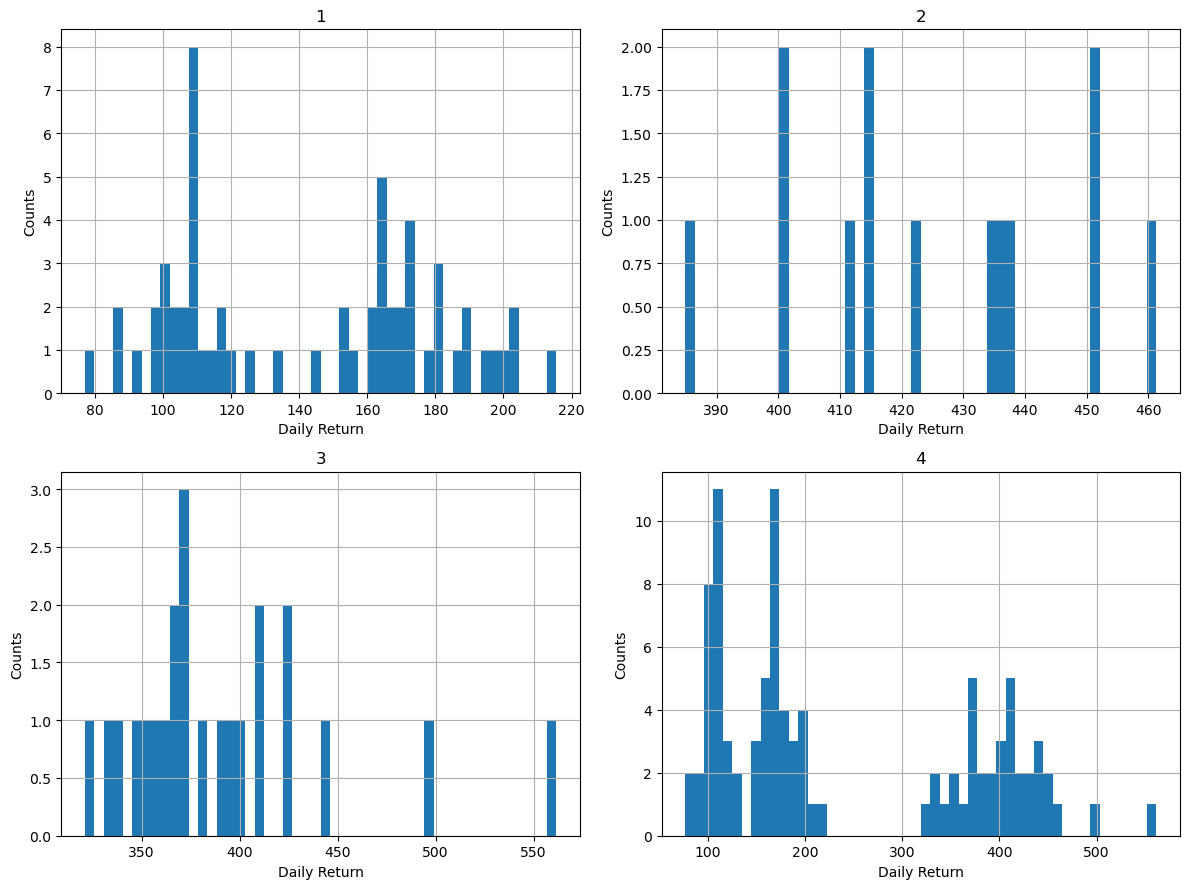

In [23]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{i}')
    
plt.tight_layout()

CORRELATION_BETWEEN_STOCK_CLOSING_PRICE


In [1]:
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

In [2]:
yf.pdr_override()

In [3]:
tech_list = ['CAP.PA','FDS','LATENTVIEW.NS']

In [4]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  3 of 3 completed


,CAP.PA,FDS,LATENTVIEW.NS
Date,,,
2022-10-13,NaN,NaN,NaN
2022-10-14,-0.002163,-0.035398,0.026469
2022-10-17,0.026943,0.031477,-0.026475
2022-10-18,-0.003317,0.005627,0.018555
2022-10-19,-0.014221,-0.007794,-0.012794


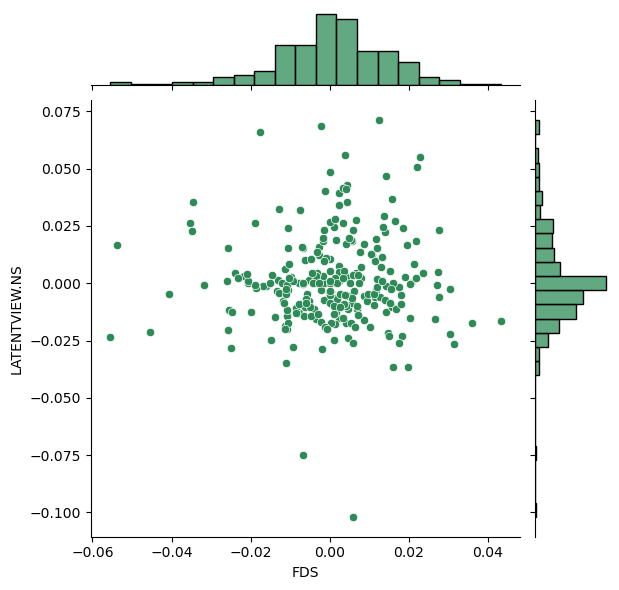

In [7]:
import seaborn as sns
sns.jointplot(x='FDS', y='LATENTVIEW.NS', data=tech_rets, kind='scatter', color='seagreen')

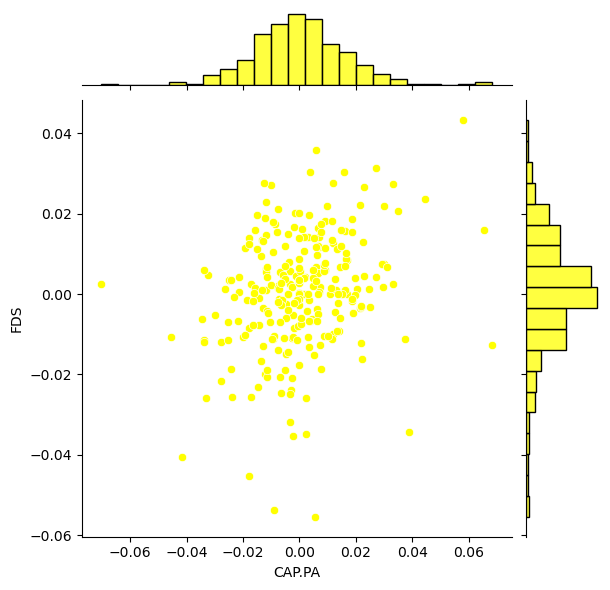

In [12]:
import seaborn as sns
sns.jointplot(x='CAP.PA', y='FDS', data=tech_rets, kind='scatter', color='yellow')

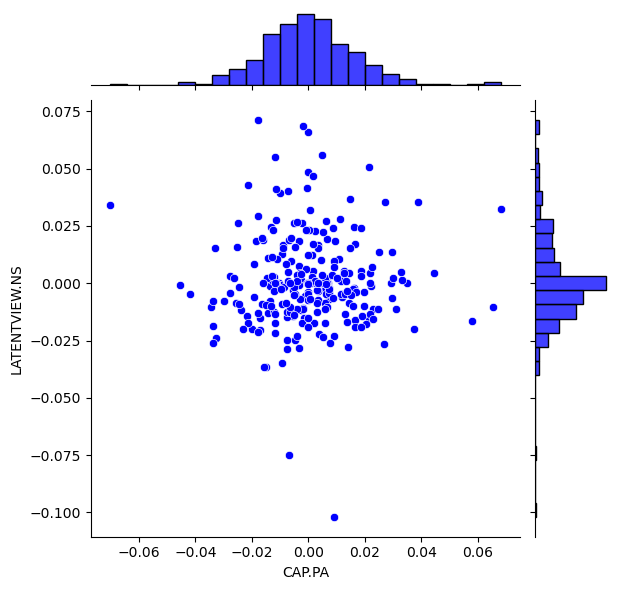

In [11]:
import seaborn as sns
sns.jointplot(x='CAP.PA', y='LATENTVIEW.NS', data=tech_rets, kind='scatter', color='blue')

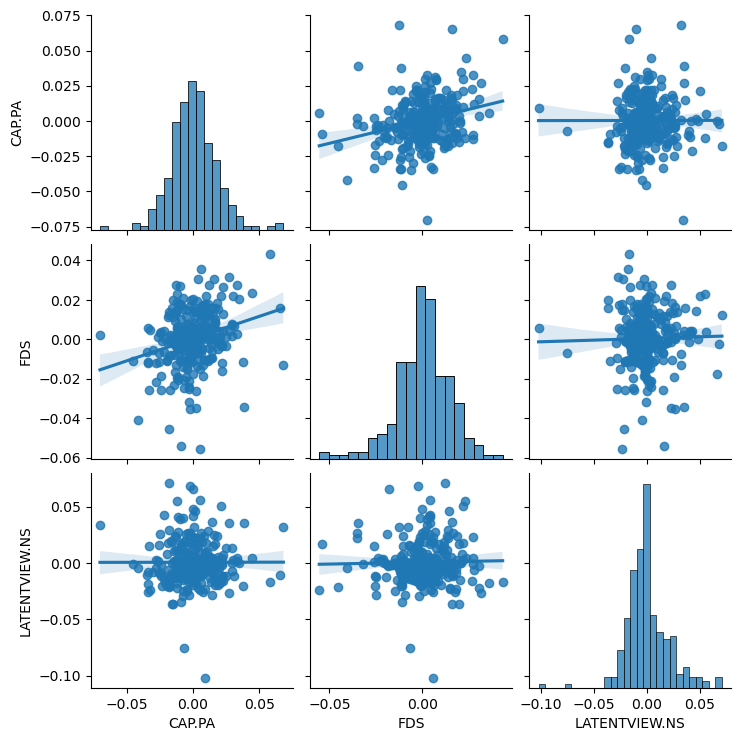

In [13]:
sns.pairplot(tech_rets, kind='reg')

RISK ON BUYING SHARES

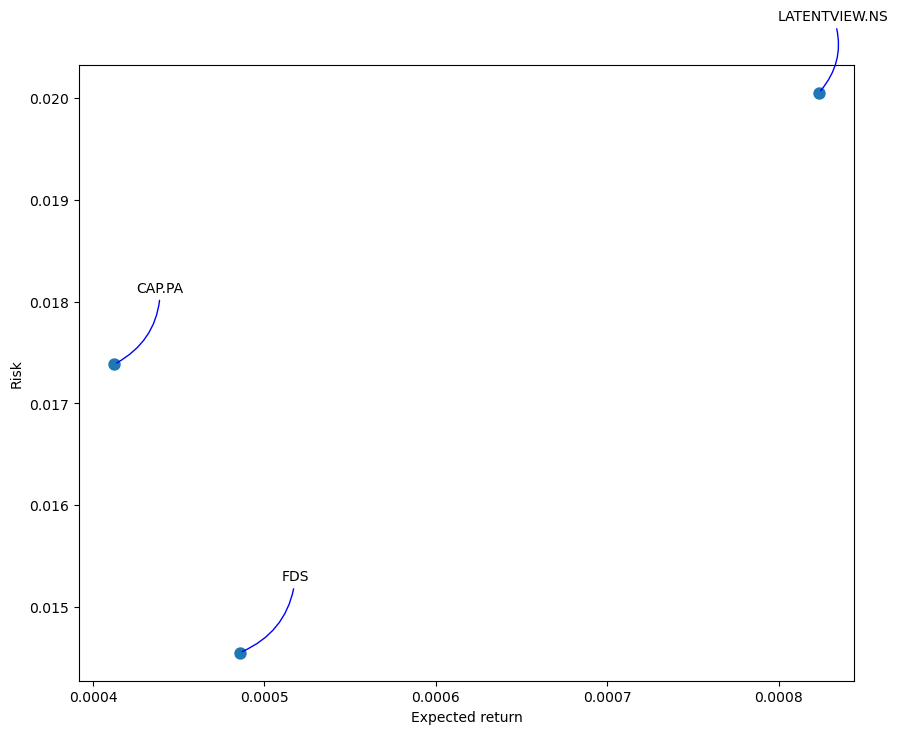

In [14]:
import numpy as np
import matplotlib.pyplot as plt

rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))